In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

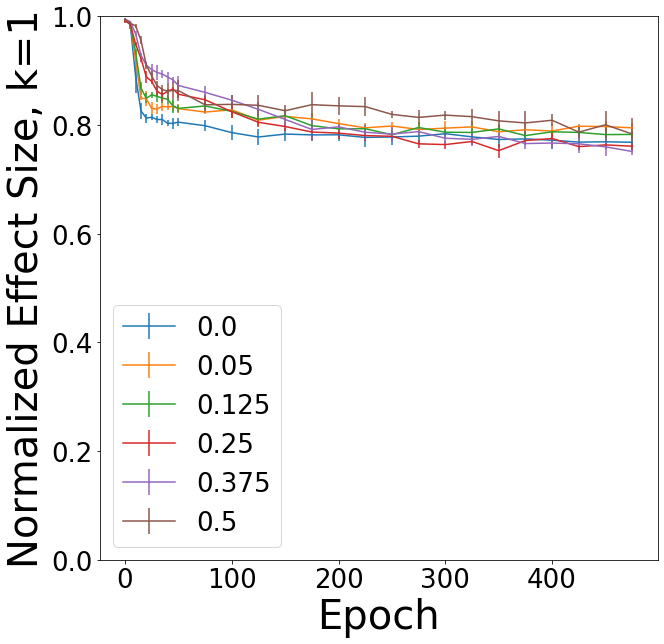

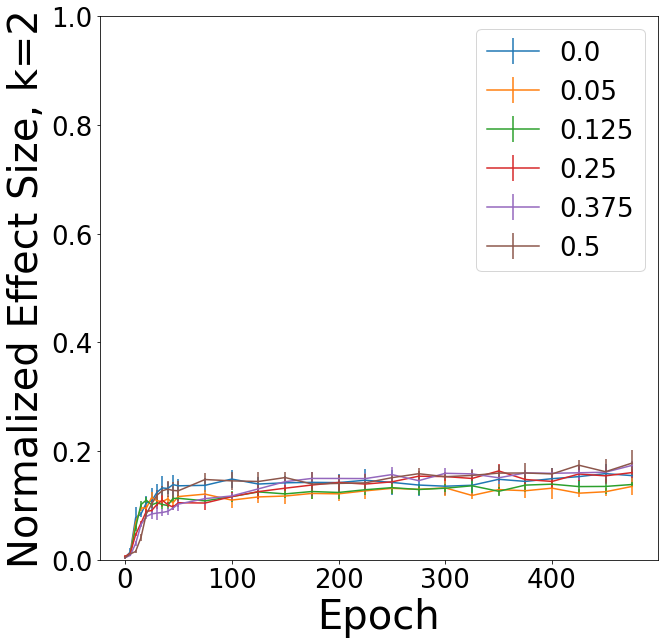

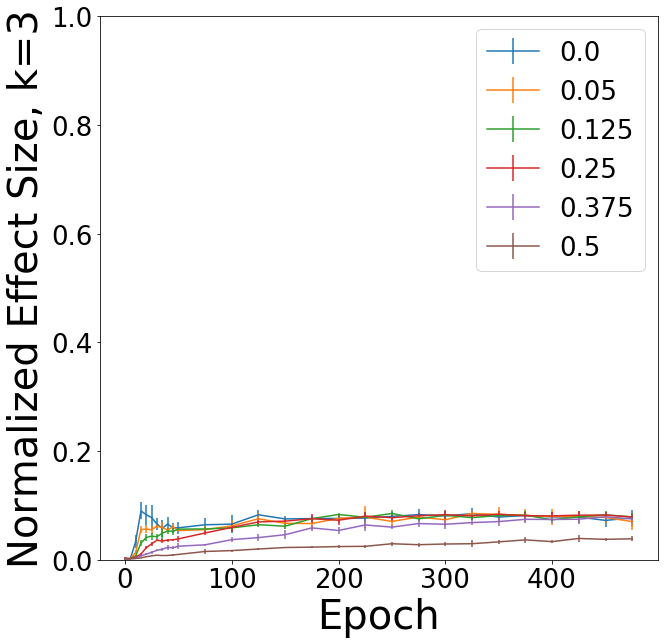

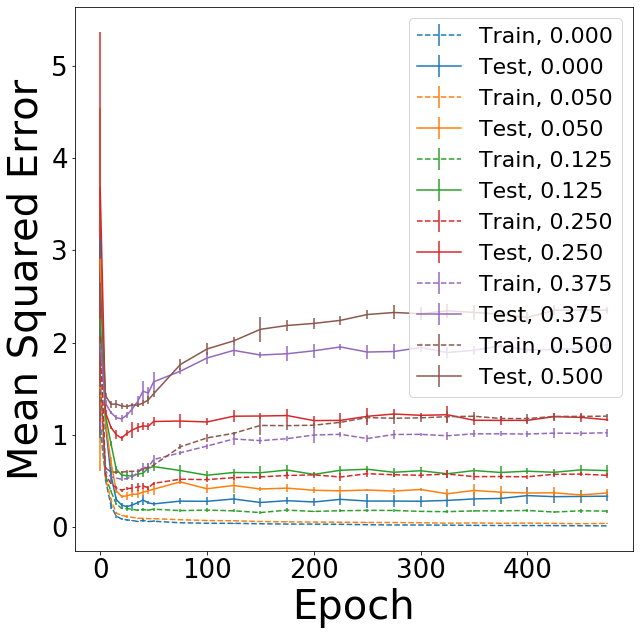

In [3]:
df = pd.read_csv("results/results_bikeshare_128.tsv", sep='\t', header=None)
vals = df.values

n_fit_iters = 5
# Plot main
epoch_labels = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475]

fig = plt.figure(figsize=(10, 10))
#plt.title("Add {}, Data_Iter {}".format(add_amount, dataset_iter))
for dropout_p in sorted(set(vals[:, 0])):
    my_results = np.zeros((n_fit_iters, len(epoch_labels))) # n_fit_iters x epochs
    for i in range(vals.shape[0]):
        if vals[i, 0] == dropout_p:
            epoch_idx = epoch_labels.index(vals[i, 2])
            my_results[int(vals[i, 1]), epoch_idx] = vals[i, 3] / (vals[i,  3] + vals[i,4] + vals[i, 5])
    plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
             yerr=np.std(my_results, axis=0), label=dropout_p)
plt.xlabel("Epoch", fontsize=40)
plt.ylabel("Normalized Effect Size, k=1", fontsize=40)
lgd = plt.legend(fontsize=26)#, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.ylim([0, 1])
plt.savefig("results/bikeshare_over_epochs_mains_128.pdf",
            dpi=300, bbox_inches='tight', bbox_artists=[lgd])

fig = plt.figure(figsize=(10, 10))
#plt.title("Add {}, Data_Iter {}".format(add_amount, dataset_iter))
for dropout_p in sorted(set(vals[:, 0])):
    my_results = np.zeros((n_fit_iters, len(epoch_labels))) # n_fit_iters x epochs
    for i in range(vals.shape[0]):
        if vals[i, 0] == dropout_p:
            epoch_idx = epoch_labels.index(vals[i, 2])
            my_results[int(vals[i, 1]), epoch_idx] = vals[i, 4] / (vals[i,  3] + vals[i,4] + vals[i, 5])
    plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
             yerr=np.std(my_results, axis=0), label=dropout_p)
plt.xlabel("Epoch", fontsize=40)
plt.ylabel("Normalized Effect Size, k=2", fontsize=40)
lgd = plt.legend(fontsize=26)#, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.ylim([0, 1])
plt.savefig("results/bikeshare_over_epochs_pairs_128.pdf",
            dpi=300, bbox_inches='tight', bbox_artists=[lgd])

fig = plt.figure(figsize=(10, 10))
#plt.title("Add {}, Data_Iter {}".format(add_amount, dataset_iter))
for dropout_p in sorted(set(vals[:, 0])):
    my_results = np.zeros((n_fit_iters, len(epoch_labels))) # n_fit_iters x epochs
    for i in range(vals.shape[0]):
        if vals[i, 0] == dropout_p:
            epoch_idx = epoch_labels.index(vals[i, 2])
            my_results[int(vals[i, 1]), epoch_idx] = vals[i, 5] / (vals[i,  3] + vals[i,4] + vals[i, 5])
    plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                 yerr=np.std(my_results, axis=0), label=dropout_p)
plt.xlabel("Epoch", fontsize=40)
plt.ylabel("Normalized Effect Size, k=3", fontsize=40)
lgd = plt.legend(fontsize=26)#, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.ylim([0, 1])
plt.savefig("results/bikeshare_over_epochs_threes_128.pdf",
            dpi=300, bbox_inches='tight', bbox_artists=[lgd])

# Plot accuracy
fig = plt.figure(figsize=(10, 10))
#colors = ['blue', 'orange', 'green', 'red', 'purple']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
#plt.title("Add {}, Data_Iter {}".format(add_amount, dataset_iter))
for j, dropout_p in enumerate(sorted(set(vals[:, 0]))):
    my_results = np.zeros((n_fit_iters, len(epoch_labels))) # n_fit_iters x epochs
    for i in range(vals.shape[0]):
        if vals[i, 0] == dropout_p:
            epoch_idx = epoch_labels.index(vals[i, 2])
            my_results[int(vals[i, 1]), epoch_idx] = vals[i, 6] # train_mse
    plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                 yerr=np.std(my_results, axis=0), label="Train, {:.3f}".format(dropout_p),
                linestyle='--', color=colors[j])

    my_results = np.zeros((n_fit_iters, len(epoch_labels))) # n_fit_iters x epochs
    for i in range(vals.shape[0]):
        if vals[i, 0] == dropout_p:
            epoch_idx = epoch_labels.index(vals[i, 2])
            my_results[int(vals[i, 1]), epoch_idx] = vals[i, 7] # test_mse
    plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                 yerr=np.std(my_results, axis=0), label="Test, {:.3f}".format(dropout_p),
                 color=colors[j])

plt.xlabel("Epoch", fontsize=40)
plt.ylabel("Mean Squared Error", fontsize=40)
lgd = plt.legend(fontsize=22)#, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.savefig("results/bikeshare_over_epochs_mses_128.pdf",
            dpi=300, bbox_inches='tight', bbox_artists=[lgd])